In [1]:
import tensorflow as tf 
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt 


In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=5

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
     "PlantVillage",
     shuffle=True,
     image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=(BATCH_SIZE)
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch , label_batch in dataset.take(1):
     print(image_batch.shape)
     print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 2 1 1 0 0 0 0]


In [7]:
for image_batch , label_batch in dataset.take(1):
     print(image_batch[0].numpy)
    

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[151., 132., 138.],
        [154., 135., 141.],
        [158., 139., 145.],
        ...,
        [160., 144., 154.],
        [161., 145., 155.],
        [162., 146., 156.]],

       [[148., 129., 135.],
        [150., 131., 137.],
        [154., 135., 141.],
        ...,
        [163., 147., 157.],
        [164., 148., 158.],
        [165., 149., 159.]],

       [[150., 131., 137.],
        [151., 132., 138.],
        [153., 134., 140.],
        ...,
        [162., 146., 156.],
        [163., 147., 157.],
        [164., 148., 158.]],

       ...,

       [[148., 129., 131.],
        [147., 128., 130.],
        [150., 131., 133.],
        ...,
        [177., 164., 171.],
        [133., 120., 127.],
        [164., 151., 158.]],

       [[137., 118., 120.],
        [146., 127., 129.],
        [176., 157., 159.],
        ...,
        [157., 144., 151.],
        [212., 199., 206.],
       

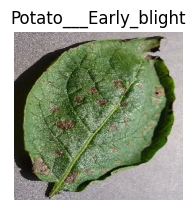

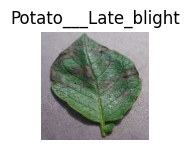

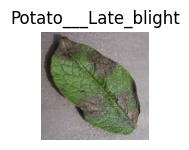

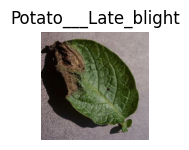

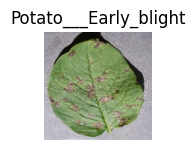

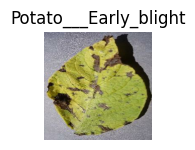

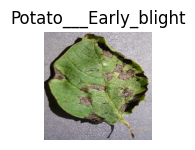

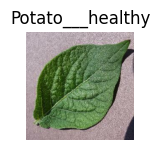

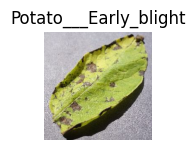

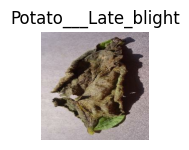

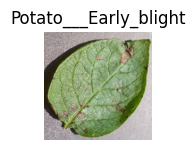

In [8]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(11):
             ax=plt.subplot(3,4,i+1) 
             plt.imshow(image_batch[i].numpy().astype('uint8'))  # Note the parentheses after .numpy()
             plt.title(class_names[label_batch[i]])
             plt.axis("off")
             plt.show()  # To display the image



In [9]:
len(dataset)

68

In [10]:
# 80% = TRAINING
# 20% = 10% VALIDATION  AND 10%  TEST FOR MODEL 

In [11]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds=dataset.take(54)
len(train_ds)

54

In [13]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [14]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
from tensorflow.keras.models import Sequential
resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resizing the image
    layers.Rescaling(1.0/255)  # Rescaling pixel values to [0, 1]
])

In [24]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip the image horizontally and vertically
    layers.RandomRotation(0.2)  # Randomly rotate the image by 20%
])

In [25]:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\Users\sindh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds  
)


Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.4587 - loss: 0.9737 - val_accuracy: 0.8073 - val_loss: 0.8905
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6231 - loss: 0.8690 - val_accuracy: 0.6354 - val_loss: 0.8018
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7064 - loss: 0.6033 - val_accuracy: 0.8177 - val_loss: 0.4552
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8182 - loss: 0.4330 - val_accuracy: 0.9115 - val_loss: 0.2208
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 213s 4s/step - accuracy: 0.8859 - loss: 0.3238 - val_accuracy: 0.8854 - val_loss: 0.2357


In [29]:
scroes=model.evaluate(test_ds)

54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 346ms/step - accuracy: 0.9026 - loss: 0.2247


In [30]:
scroes

[0.22139617800712585, 0.9068287014961243]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [33]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
history.history['accuracy']

[0.5092592835426331,
 0.626173734664917,
 0.7271126508712769,
 0.8603286147117615,
 0.8894675970077515]

In [35]:
len(history.history['accuracy'])

5

In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

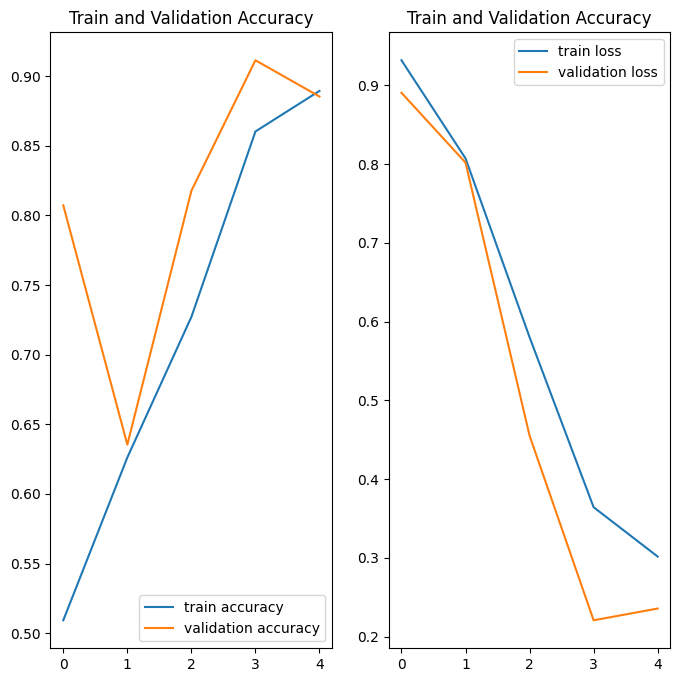

In [37]:
import matplotlib.pyplot as plt

# Correct figure creation
plt.figure(figsize=(8, 8))

# Correct subplot creation
plt.subplot(1, 2, 1)

# Plotting accuracy
plt.plot(range(EPOCHS), acc, label='train accuracy')
plt.plot(range(EPOCHS), val_acc, label='validation accuracy')

# Adding legend and title
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')


plt.subplot(1, 2, 2)

# Plotting accuracy
plt.plot(range(EPOCHS), loss, label='train loss')
plt.plot(range(EPOCHS), val_loss, label='validation loss')

# Adding legend and title
plt.legend(loc='upper right')
plt.title('Train and Validation Accuracy')
# Display the plot
plt.show()


First image for prediction


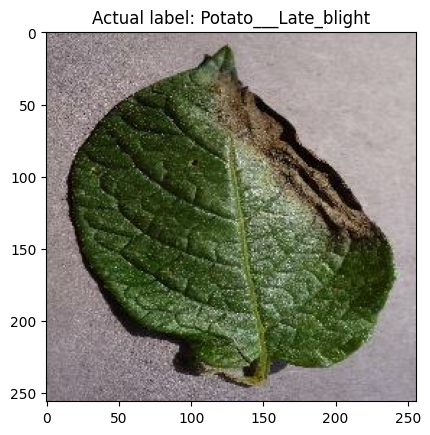

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
Predicted label: Potato___Late_blight


In [41]:
import numpy as np 


for image_batch, label_batch in test_ds.take(1):
    # Convert the first image to uint8
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("First image for prediction")
    plt.imshow(first_image)
    plt.title(f'Actual label: {class_names[first_label]}')
    plt.show()

    # Make predictions on the batch
    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [54]:
import numpy as np 
def predict(model,img):
     img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
     img_array=tf.expand_dims(img_array,0)

     predictions=model.predict(img_array)

     Predicted_class=class_names[np.argmax(predictions[0])]
     confidence=round(100*(np.max(predictions[0])),2)
     return Predicted_class,confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


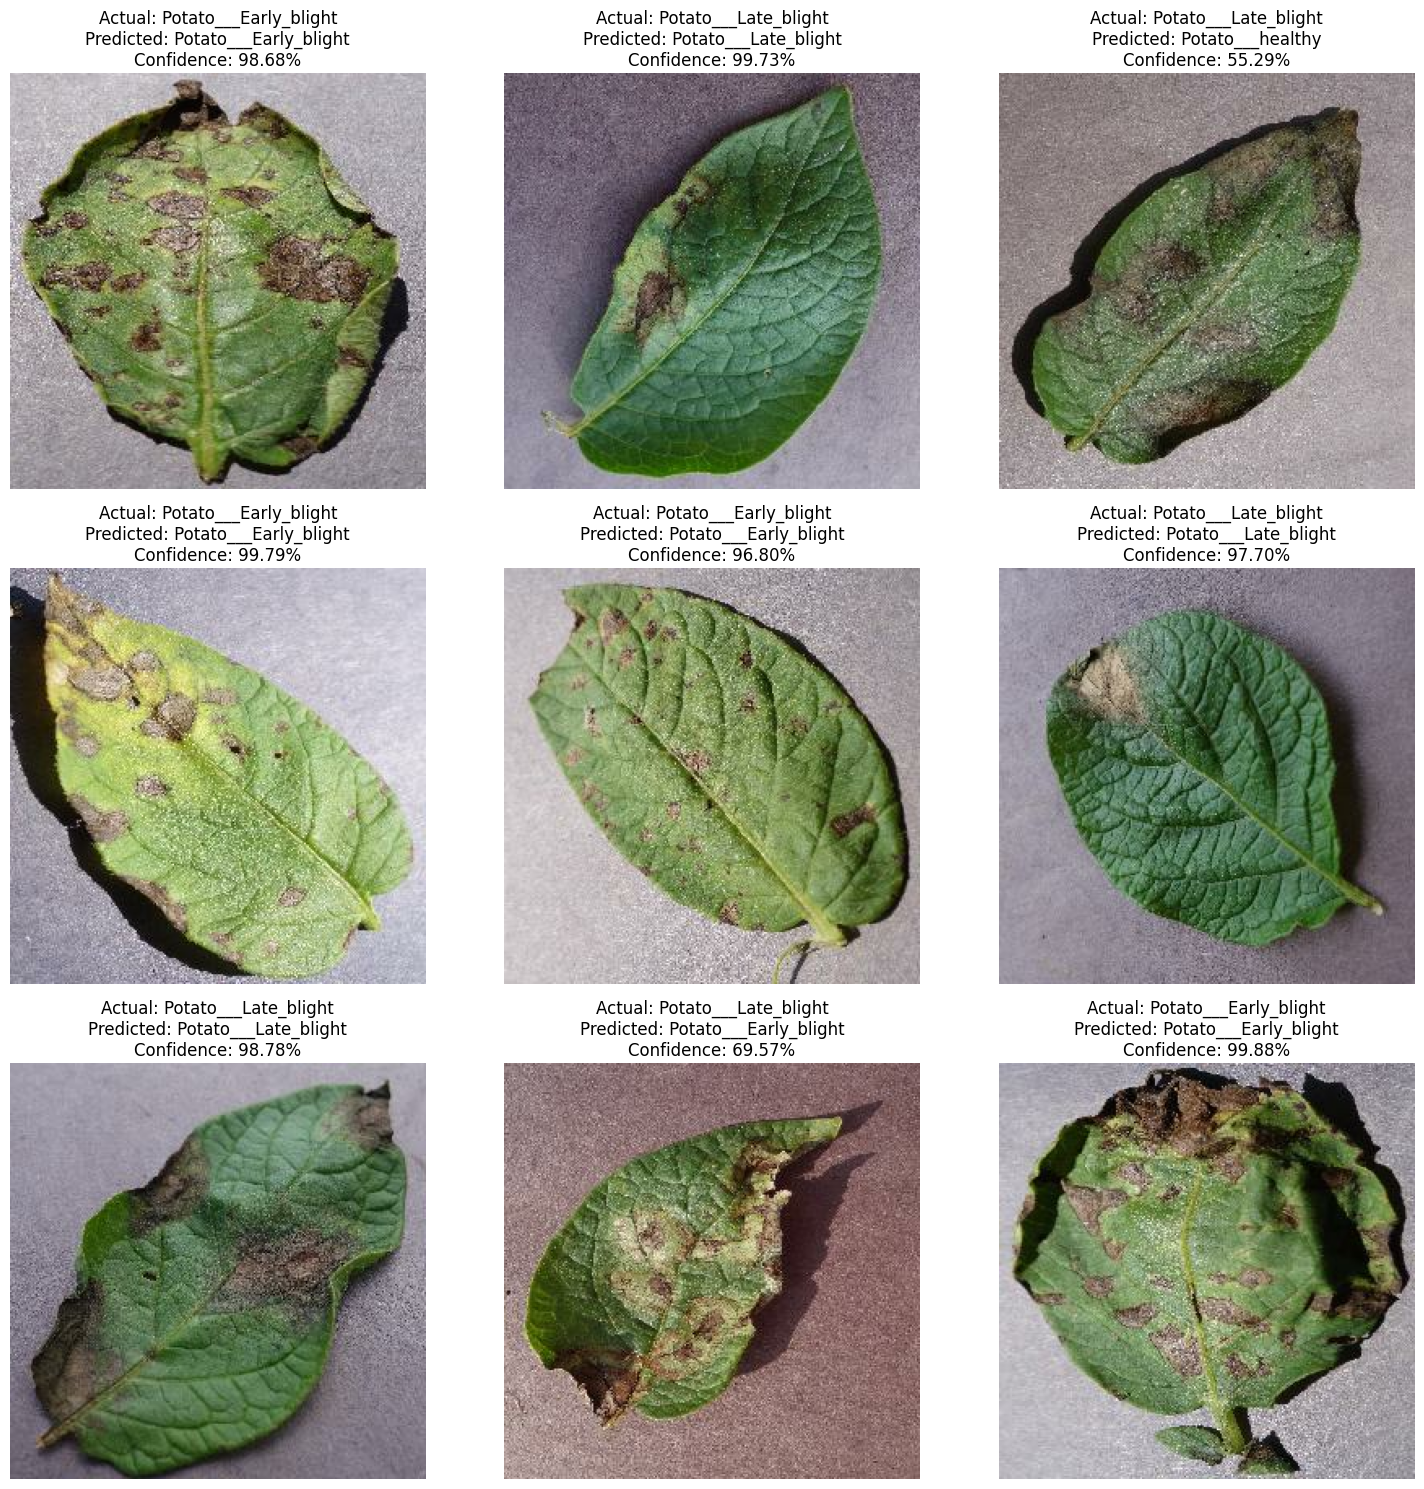

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        Predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {Predicted_class}\nConfidence: {confidence:.2f}%", fontsize=12)
        plt.axis('off')
plt.tight_layout()
plt.show()


In [58]:
import os

# Determine the next model version
model_version = max([int(i.split('.')[0]) for i in os.listdir("../models") if i.split('.')[0].isdigit()] + [0]) + 1

# Save the model using a valid extension (.keras or .h5)
model.save(f"../models/{model_version}.keras")  # You can also use ".h5" instead of ".keras" if you prefer
